In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Regressão linear simples

In [2]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [3]:
# Carregamento da base de dados e exclusão da primeira coluna
base = pd.read_csv('/home/luciano/GitHub/Treinamento_R_Python/Seção 22/dados/cars.csv')
base.shape

(50, 3)

In [4]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [6]:
# Definição das variáveis X e Y, X distância é a variável independente e Y velocidade é a variável dependente
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values
X

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [7]:
# Cálculo da correlação entre X e Y
correlacao = np.corrcoef(X, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [8]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1) 
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [9]:
# Visualização dos coeficientes
modelo.intercept_

8.283905641787172

In [10]:
#inclinacao
modelo.coef_

array([0.16556757])

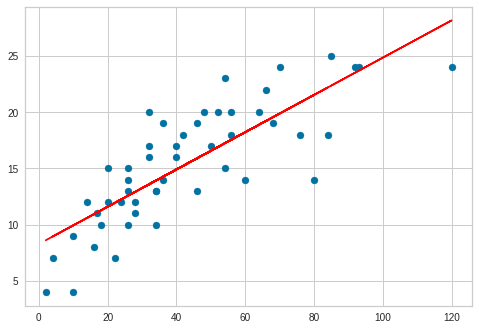

In [11]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [12]:
# Previsão da "distância 22 pés" usando a fórmula manual
# interceptação * inclinação * valor de dist
#Qual velocidade se levou 22 pés pra parar?
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [13]:
# Previsão utilizando função do sklearn
modelo.predict([[22]])

array([11.92639228])

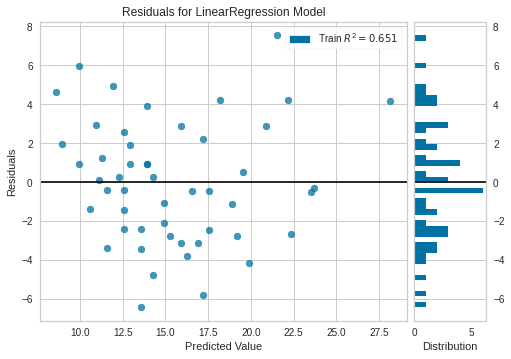

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()